In [1]:
import pandas as pd  # Pandas; open source data analysis/manipulation tool library
import numpy as np  # NumPy; used to work with arrays, can also be used to use mathematics and perform data analysis
import matplotlib.pyplot as plot  # Matplotlib; visualization/modelling library
import chardet  # Universal language detector; automatically detects encoded character of dataset
import seaborn as sns  # Matplotlib based library, simplifies the process of visualisation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [3]:
# Pregnancies - Amount of times patient has been pregnant
# Glucose - Plasma glucose concentration, 2 hours in after oral glucose tolerance test
# BloodPressure - Diastolic Blood pressure (mm Hg)
# SkinThickness - Thickness of the triceps skin (mm)
# Insulin - 2-Hour serum insulin (mg/DL)
# BMI - The body mass index (weight in kg/(height in m)^2)
# DiabetesPedigreeFunction/Pedigree - Diabetes pedigree function (may have or not have diabetes based on family history (1 or 0)
# Age - Age in years
# Outcome - Boolean 1 or 0, (1 meaning diagnosed diabetes, 0 means not)

In [5]:
with open('diabetes.csv', 'rb') as r:
    enc = chardet.detect(r.read())

pima = pd.read_csv('diabetes.csv', encoding=enc['encoding'])

In [7]:
print("------------------------")
print("Types of data:")
print(pima.dtypes)
print("------------------------")

------------------------
Types of data:
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object
------------------------


In [9]:
print("------------------------")
print("Checking for null values:", pima.isnull().values.any())
print("------------------------")

------------------------
Checking for null values: False
------------------------


In [11]:
print("------------------------")
print("Numerical statistics:")
print(pima.describe())
print("------------------------")

------------------------
Numerical statistics:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232   

In [13]:
print("------------------------")
print("Checking for zero values:")
print("Glucose = ", (pima.Glucose == 0).sum())
print("BloodPressure = ", (pima.BloodPressure == 0).sum())
print("SkinThickness = ", (pima.SkinThickness == 0).sum())
print("Insulin = ", (pima.Insulin == 0).sum())
print("BMI = ", (pima.BMI == 0).sum())
print("DiabetesPedigreeFunction = ", (pima.DiabetesPedigreeFunction == 0).sum())
print("Age = ", (pima.Age == 0).sum())
print("------------------------")

------------------------
Checking for zero values:
Glucose =  5
BloodPressure =  35
SkinThickness =  227
Insulin =  374
BMI =  11
DiabetesPedigreeFunction =  0
Age =  0
------------------------


In [15]:
print("------------------------")
print("Showing first 15 records:")
print(pima.head(15))
print("------------------------")

------------------------
Showing first 15 records:
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0             6      148             72             35        0  33.6   
1             1       85             66             29        0  26.6   
2             8      183             64              0        0  23.3   
3             1       89             66             23       94  28.1   
4             0      137             40             35      168  43.1   
5             5      116             74              0        0  25.6   
6             3       78             50             32       88  31.0   
7            10      115              0              0        0  35.3   
8             2      197             70             45      543  30.5   
9             8      125             96              0        0   0.0   
10            4      110             92              0        0  37.6   
11           10      168             74              0        0  38.0   


In [17]:
print("------------------------")
print("Showing last 15 records:")
print(pima.tail(15))
print("------------------------")

------------------------
Showing last 15 records:
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
753            0      181             88             44      510  43.3   
754            8      154             78             32        0  32.4   
755            1      128             88             39      110  36.5   
756            7      137             90             41        0  32.0   
757            0      123             72              0        0  36.3   
758            1      106             76              0        0  37.5   
759            6      190             92              0        0  35.5   
760            2       88             58             26       16  28.4   
761            9      170             74             31        0  44.0   
762            9       89             62              0        0  22.5   
763           10      101             76             48      180  32.9   
764            2      122             70             27       

In [19]:
pima.rename(columns={'DiabetesPedigreeFunction': 'Pedigree'}, inplace=True)  # Variable name too long

pima['Glucose'] = pima['Glucose'].replace(0, np.nan)
pima['BloodPressure'] = pima['BloodPressure'].replace(0, np.nan)
pima['SkinThickness'] = pima['SkinThickness'].replace(0, np.nan)
pima['Insulin'] = pima['Insulin'].replace(0, np.nan)
pima['BMI'] = pima['BMI'].replace(0, np.nan)

pima.dropna(subset=['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI'], inplace=True)

print("------------------------")
print(pima)
print("------------------------")

print("------------------------")
print("Numerical statistics after '0' missing value removal:")
print(pima.describe())
print("------------------------")

------------------------
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
3              1     89.0           66.0           23.0     94.0  28.1   
4              0    137.0           40.0           35.0    168.0  43.1   
6              3     78.0           50.0           32.0     88.0  31.0   
8              2    197.0           70.0           45.0    543.0  30.5   
13             1    189.0           60.0           23.0    846.0  30.1   
..           ...      ...            ...            ...      ...   ...   
753            0    181.0           88.0           44.0    510.0  43.3   
755            1    128.0           88.0           39.0    110.0  36.5   
760            2     88.0           58.0           26.0     16.0  28.4   
763           10    101.0           76.0           48.0    180.0  32.9   
765            5    121.0           72.0           23.0    112.0  26.2   

     Pedigree  Age  Outcome  
3       0.167   21        0  
4       2.288   33        

------------------------
Diagnosed Diabetes =  130
Not diagnosed with Diabetes =  262
------------------------


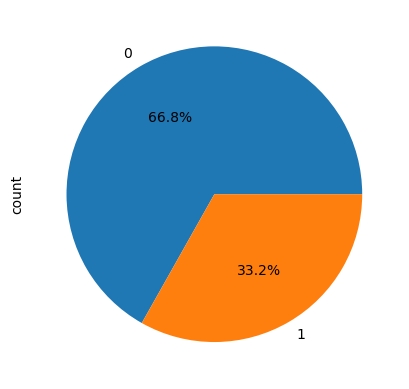

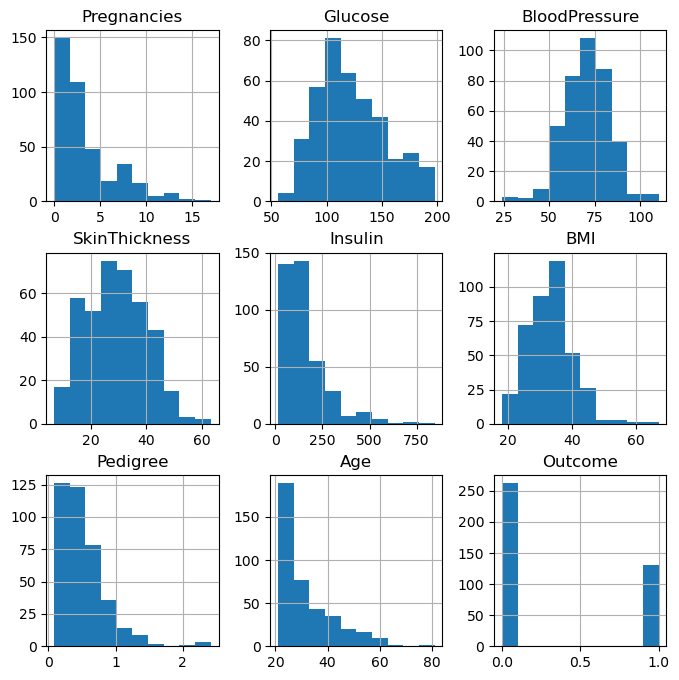

In [21]:
print("------------------------")
print("Diagnosed Diabetes = ", (pima.Outcome == 1).sum())
print("Not diagnosed with Diabetes = ", (pima.Outcome == 0).sum())
print("------------------------")

pima['Outcome'].value_counts().plot.pie(autopct='%1.1f%%')
plot.show()

pima.hist(figsize=(8, 8))
plot.show()

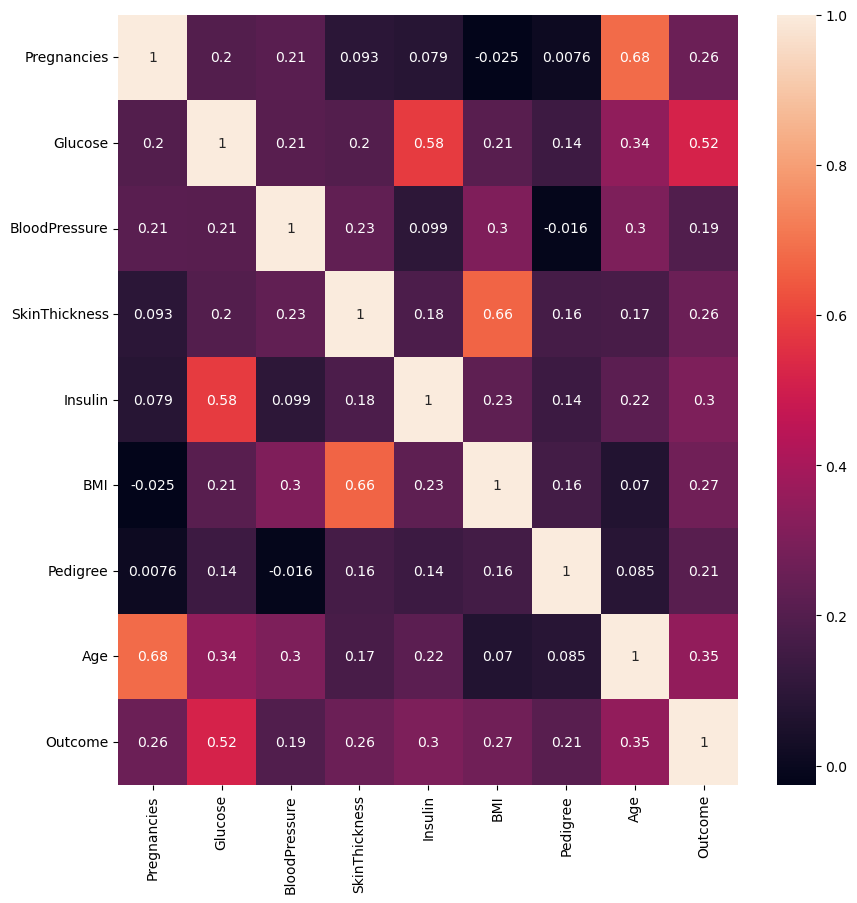

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
3              1     89.0           66.0           23.0     94.0  28.1   
18             1    103.0           30.0           38.0     83.0  43.3   
20             3    126.0           88.0           41.0    235.0  39.3   
27             1     97.0           66.0           15.0    140.0  23.2   
28            13    145.0           82.0           19.0    110.0  22.2   
..           ...      ...            ...            ...      ...   ...   
747            1     81.0           74.0           41.0     57.0  46.3   
751            1    121.0           78.0           39.0     74.0  39.0   
760            2     88.0           58.0           26.0     16.0  28.4   
763           10    101.0           76.0           48.0    180.0  32.9   
765            5    121.0           72.0           23.0    112.0  26.2   

     Pedigree  Age  Outcome  
3       0.167   21        0  
18      0.183   33        0  
20      0.704   27   

In [23]:
corrmap = pima.corr()
plot.figure(figsize=(10, 10))
sns.heatmap(corrmap, annot=True)
plot.show()

pima_1 = pima.loc[pima["Outcome"] == 1]
pima_0 = pima.loc[pima["Outcome"] == 0]

print(pima_0)
print(pima_1)

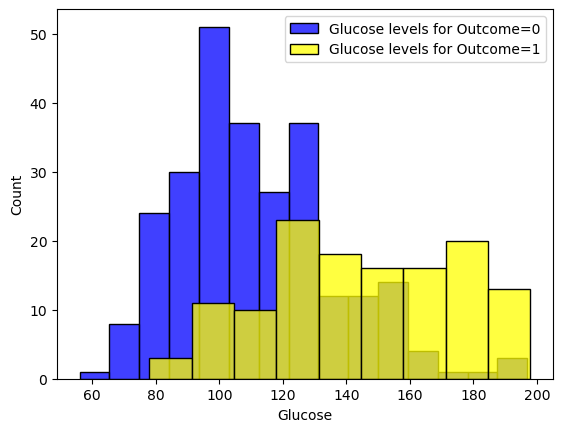

In [25]:
sns.histplot(pima_0.Glucose, color="Blue", label="Glucose levels for Outcome=0")
sns.histplot(pima_1.Glucose, color="Yellow", label="Glucose levels for Outcome=1")
plot.legend()
plot.show()

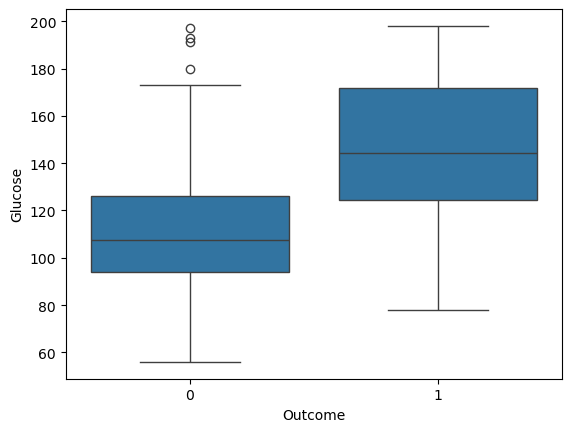

In [27]:
sns.boxplot(x=pima.Outcome, y=pima.Glucose)
plot.show()

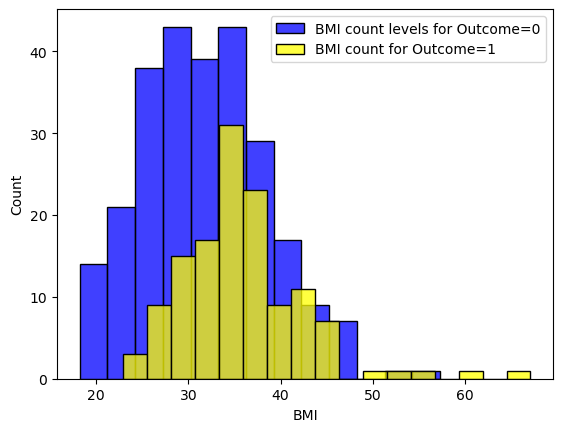

In [29]:
sns.histplot(pima_0.BMI, color="Blue", label="BMI count levels for Outcome=0")
sns.histplot(pima_1.BMI, color="Yellow", label="BMI count for Outcome=1")
plot.legend()
plot.show()

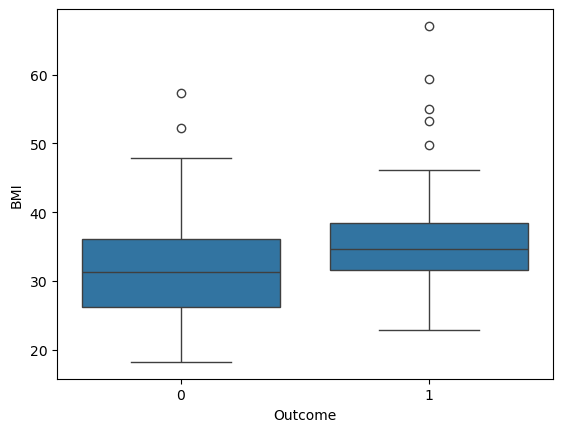

In [31]:
sns.boxplot(x=pima.Outcome, y=pima.BMI)
plot.show()

In [33]:
x = pima.drop(["Outcome"], axis=1)
y = pima["Outcome"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=21)
print(x_train, y_train)
lreg = LogisticRegression()
lreg = LogisticRegression(solver='lbfgs', max_iter=500)
lreg.fit(x_train, y_train)
scoretrain = lreg.score(x_train, y_train)
print("Predicted score (train):", scoretrain)

scoretest = lreg.score(x_test, y_test)
print("Predicted score (test):", scoretest)
preds = lreg.predict(x_test)
matrix = confusion_matrix(y_test, preds)
print(matrix)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
741            3    102.0           44.0           20.0     94.0  30.8   
16             0    118.0           84.0           47.0    230.0  45.8   
379            0     93.0          100.0           39.0     72.0  43.4   
159           17    163.0           72.0           41.0    114.0  40.9   
428            0    135.0           94.0           46.0    145.0  40.6   
..           ...      ...            ...            ...      ...   ...   
716            3    173.0           78.0           39.0    185.0  33.8   
108            3     83.0           58.0           31.0     18.0  34.3   
508            2     84.0           50.0           23.0     76.0  30.4   
608            0    152.0           82.0           39.0    272.0  41.5   
411            1    112.0           72.0           30.0    176.0  34.4   

     Pedigree  Age  
741     0.400   26  
16      0.551   31  
379     1.021   35  
159     0.817   47  
428   